In [19]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [20]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [21]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_NEM.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

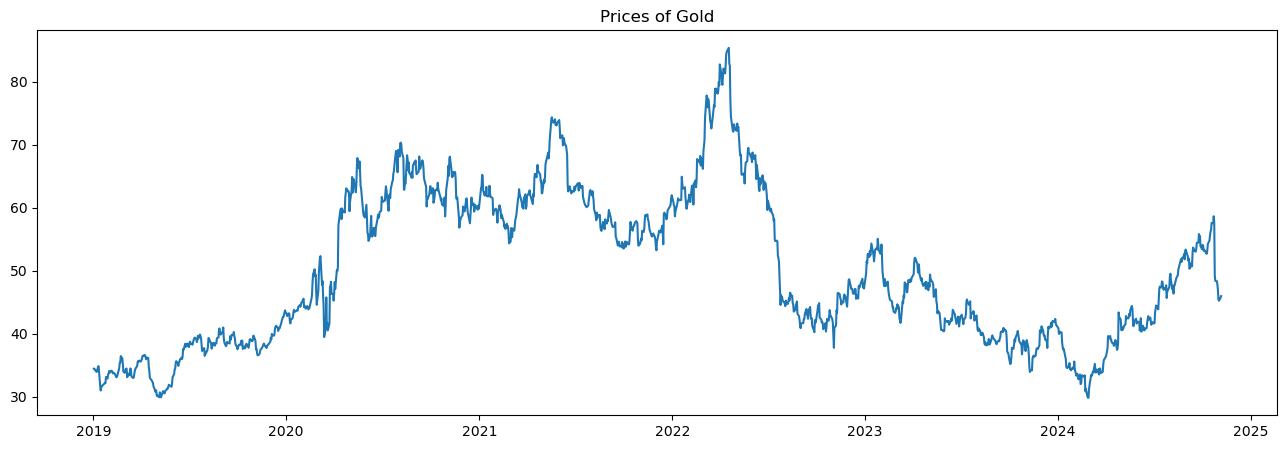

In [22]:
# Format column Date
df.index = pd.to_datetime(df.index, format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis=1, inplace=True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16, 5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [23]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [24]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [25]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [8]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50, return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.14725, saving model to save_model_7_2_1.keras
19/19 - 4s - 225ms/step - loss: 0.1472
Epoch 2/80

Epoch 2: loss improved from 0.14725 to 0.06051, saving model to save_model_7_2_1.keras
19/19 - 1s - 54ms/step - loss: 0.0605
Epoch 3/80

Epoch 3: loss improved from 0.06051 to 0.04880, saving model to save_model_7_2_1.keras
19/19 - 1s - 62ms/step - loss: 0.0488
Epoch 4/80

Epoch 4: loss improved from 0.04880 to 0.04604, saving model to save_model_7_2_1.keras
19/19 - 1s - 56ms/step - loss: 0.0460
Epoch 5/80

Epoch 5: loss improved from 0.04604 to 0.04219, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0422
Epoch 6/80

Epoch 6: loss improved from 0.04219 to 0.04018, saving model to save_model_7_2_1.keras
19/19 - 1s - 57ms/step - loss: 0.0402
Epoch 7/80

Epoch 7: loss did not improve from 0.04018
19/19 - 1s - 52ms/step - loss: 0.0409
Epoch 8/80

Epoch 8: loss improved from 0.04018 to 0.03757, saving model to save_model_7_2_1.keras


In [26]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [27]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [28]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [29]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [30]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.29751670360565186], [0.30191439390182495], [0.30491456389427185], [0.3065398633480072], [0.30719590187072754], [0.30738362669944763], [0.30757102370262146], [0.3081091046333313], [0.3092004656791687], [0.31090718507766724], [0.31318238377571106], [0.315910667181015], [0.3189479410648346], [0.32215240597724915], [0.3254052400588989], [0.3286224901676178], [0.33175578713417053], [0.3347885310649872], [0.33772769570350647], [0.34059441089630127], [0.34341567754745483], [0.34621796011924744], [0.349022775888443], [0.3518453538417816], [0.3546942472457886], [0.357573002576828], [0.36048147082328796], [0.3634178340435028], [0.36637988686561584], [0.3693663775920868]]


In [31]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

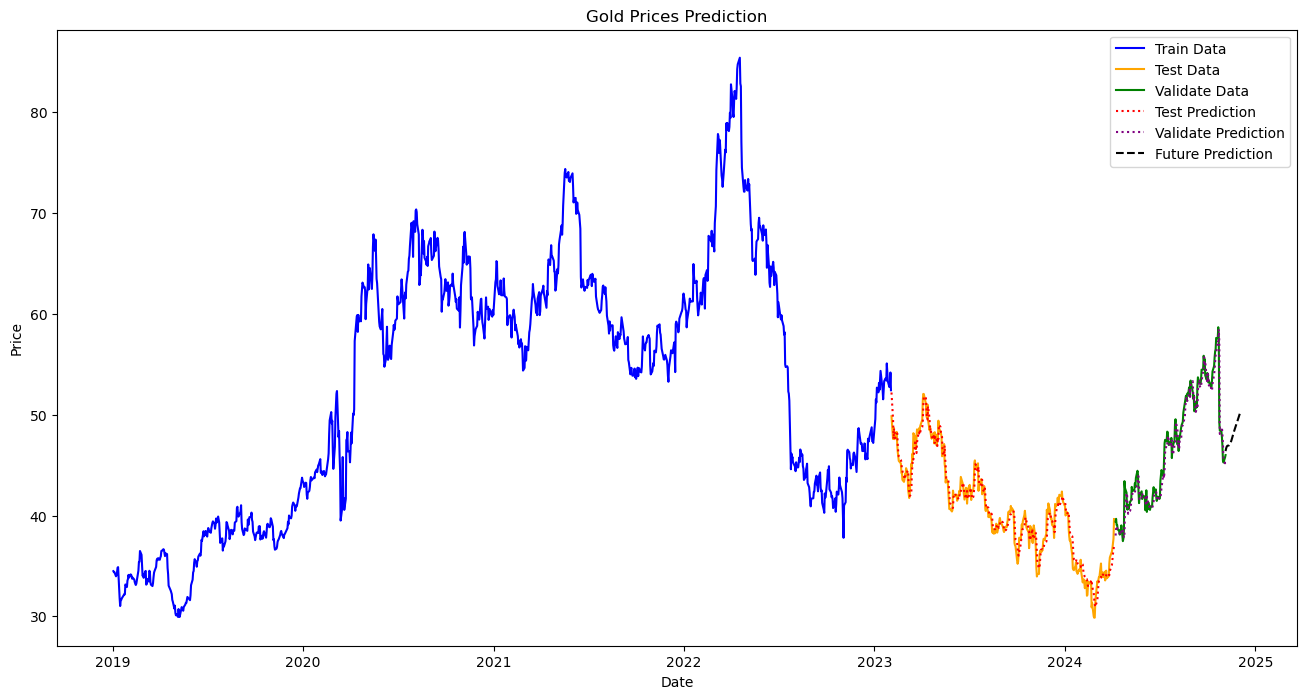

In [33]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [34]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.7723626830154358
MAPE:  1.947281921182426
RMSE:  0.9953886007569607

** Validate **
MAE:  0.7887236619549727
MAPE:  1.6857230441578634
RMSE:  1.1915106843153487


# Split dataset (6-3-1)

---



In [35]:
#Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [36]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [37]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [60]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.17940, saving model to save_model_6_3_1.keras
16/16 - 4s - 247ms/step - loss: 0.1794
Epoch 2/80

Epoch 2: loss improved from 0.17940 to 0.07442, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0744
Epoch 3/80

Epoch 3: loss improved from 0.07442 to 0.05327, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0533
Epoch 4/80

Epoch 4: loss improved from 0.05327 to 0.04780, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0478
Epoch 5/80

Epoch 5: loss improved from 0.04780 to 0.04628, saving model to save_model_6_3_1.keras
16/16 - 1s - 62ms/step - loss: 0.0463
Epoch 6/80

Epoch 6: loss improved from 0.04628 to 0.04402, saving model to save_model_6_3_1.keras
16/16 - 1s - 75ms/step - loss: 0.0440
Epoch 7/80

Epoch 7: loss improved from 0.04402 to 0.04181, saving model to save_model_6_3_1.keras
16/16 - 1s - 79ms/step - loss: 0.0418
Epoch 8/80

Epoch 8: loss improved from 0.04181 to 0.04

In [38]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [39]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [40]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [41]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [42]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.29751670360565186], [0.30191439390182495], [0.30491456389427185], [0.3065398633480072], [0.30719590187072754], [0.30738362669944763], [0.30757102370262146], [0.3081091046333313], [0.3092004656791687], [0.31090718507766724], [0.31318238377571106], [0.315910667181015], [0.3189479410648346], [0.32215240597724915], [0.3254052400588989], [0.3286224901676178], [0.33175578713417053], [0.3347885310649872], [0.33772769570350647], [0.34059441089630127], [0.34341567754745483], [0.34621796011924744], [0.349022775888443], [0.3518453538417816], [0.3546942472457886], [0.357573002576828], [0.36048147082328796], [0.3634178340435028], [0.36637988686561584], [0.3693663775920868]]


In [43]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [44]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[46.39002794]
 [46.6343636 ]
 [46.80105304]
 [46.89135467]
 [46.92780417]
 [46.93823416]
 [46.94864594]
 [46.97854171]
 [47.03917773]
 [47.13400305]
 [47.26041309]
 [47.41199651]
 [47.58074744]
 [47.7587875 ]
 [47.93951495]
 [48.11826536]
 [48.29235133]
 [48.46085058]
 [48.62415056]
 [48.78342525]
 [48.94017482]
 [49.09586963]
 [49.25170519]
 [49.40852761]
 [49.56681212]
 [49.72675576]
 [49.88835025]
 [50.05149458]
 [50.21606623]
 [50.38199565]]


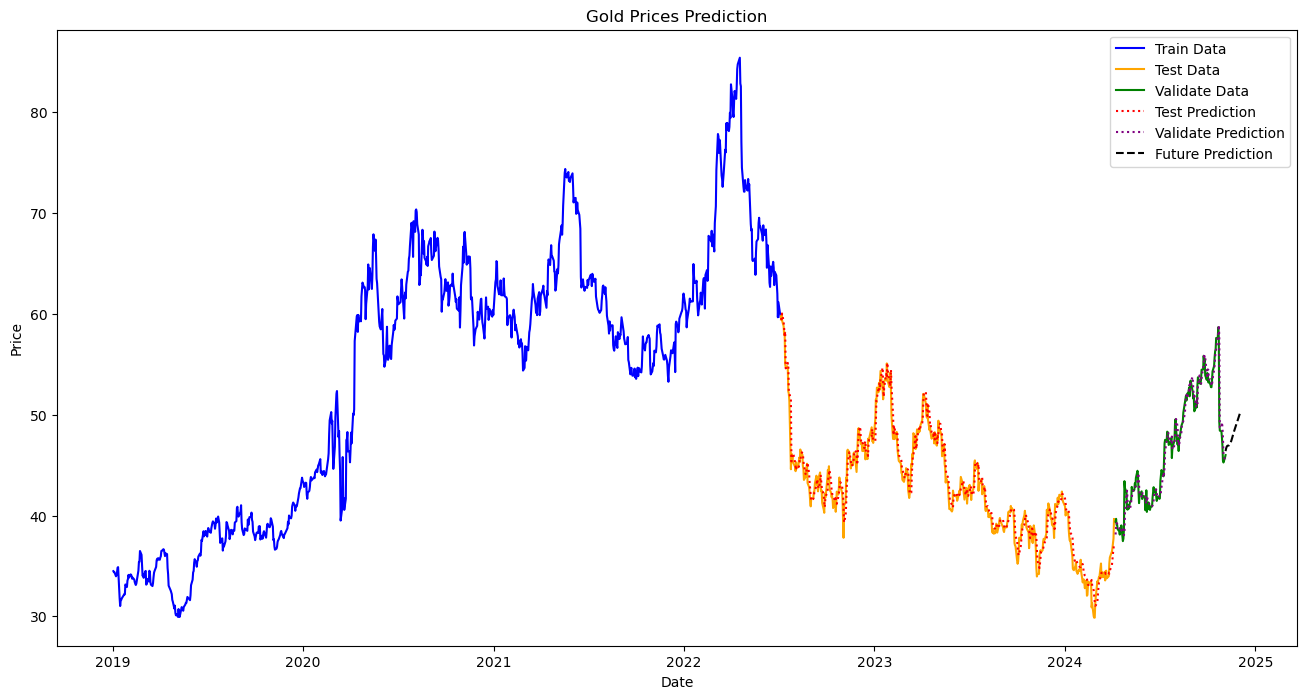

In [46]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [68]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.8663311609575295
MAPE:  2.0830808976927817
RMSE:  1.1468310784708122

** Validate **
MAE:  0.9163985639201726
MAPE:  1.9389984423070459
RMSE:  1.3002402907430364


# Split dataset (5-3-2)

---



In [47]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [48]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [49]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [50]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19366, saving model to save_model_5_3_2.keras
13/13 - 4s - 305ms/step - loss: 0.1937
Epoch 2/80

Epoch 2: loss improved from 0.19366 to 0.07100, saving model to save_model_5_3_2.keras
13/13 - 1s - 66ms/step - loss: 0.0710
Epoch 3/80

Epoch 3: loss improved from 0.07100 to 0.05410, saving model to save_model_5_3_2.keras
13/13 - 1s - 64ms/step - loss: 0.0541
Epoch 4/80

Epoch 4: loss improved from 0.05410 to 0.04857, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0486
Epoch 5/80

Epoch 5: loss improved from 0.04857 to 0.04423, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0442
Epoch 6/80

Epoch 6: loss improved from 0.04423 to 0.04386, saving model to save_model_5_3_2.keras
13/13 - 1s - 53ms/step - loss: 0.0439
Epoch 7/80

Epoch 7: loss did not improve from 0.04386
13/13 - 1s - 51ms/step - loss: 0.0440
Epoch 8/80

Epoch 8: loss improved from 0.04386 to 0.04159, saving model to save_model_5_3_2.keras


In [51]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [52]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [53]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [54]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.1972642109669669, 0.19888408432824267, 0.21472283718365226, 0.23308137740674162, 0.22318211401303745, 0.2293016274207339, 0.21670268986239316, 0.20860332359597034, 0.21562275137004172, 0.21616268623896606, 0.21220304963598702, 0.21328291919385034, 0.24460044540721904, 0.2636788760506922, 0.2568394724025974, 0.25251978754766524, 0.2807775225899417, 0.3115550453598688, 0.31767455876756523, 0.3147947917224495, 0.3322534177591494, 0.33135350357276006, 0.31767455876756523, 0.3084953229432792, 0.3137149221645862, 0.309755216627119, 0.32109432925612247, 0.28509720744487377, 0.30363570321942257, 0.3135348980386097, 0.31587473021480095, 0.3457523384383677, 0.3543916395737149, 0.3356731196731896, 0.30903525781220353, 0.31929443194885565, 0.2976962139377026, 0.32127428462759644, 0.32127428462759644, 0.3407127635230227, 0.34485242425197826, 0.34701223230219314, 0.3500720232932999, 0.3662706868916573, 0.38390926847981666, 0.38858893265221384, 0.39614829529520956, 0.38786897383729835, 0.

In [55]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.2876371145248413], [0.28861236572265625], [0.2884565591812134], [0.28773611783981323], [0.286776065826416], [0.2857933044433594], [0.2849464416503906], [0.2843371629714966], [0.28401264548301697], [0.28397515416145325], [0.28419551253318787], [0.2846265733242035], [0.2852139174938202], [0.2859039604663849], [0.2866489887237549], [0.28740963339805603], [0.28815579414367676], [0.2888656556606293], [0.28952497243881226], [0.2901250422000885], [0.2906613349914551], [0.2911320626735687], [0.2915372848510742], [0.29187798500061035], [0.2921557128429413], [0.2923724949359894], [0.2925302982330322], [0.2926315367221832], [0.29267871379852295], [0.29267457127571106]]


In [56]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [57]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[45.84111799]
 [45.89530295]
 [45.88664633]
 [45.84661862]
 [45.79327813]
 [45.73867591]
 [45.69162421]
 [45.65777269]
 [45.6397425 ]
 [45.63765948]
 [45.64990259]
 [45.67385233]
 [45.70648517]
 [45.74482396]
 [45.78621772]
 [45.82847914]
 [45.86993583]
 [45.90937573]
 [45.94600737]
 [45.97934725]
 [46.00914367]
 [46.0352973 ]
 [46.05781144]
 [46.07674074]
 [46.0921713 ]
 [46.10421572]
 [46.11298327]
 [46.11860808]
 [46.12122923]
 [46.12099908]]


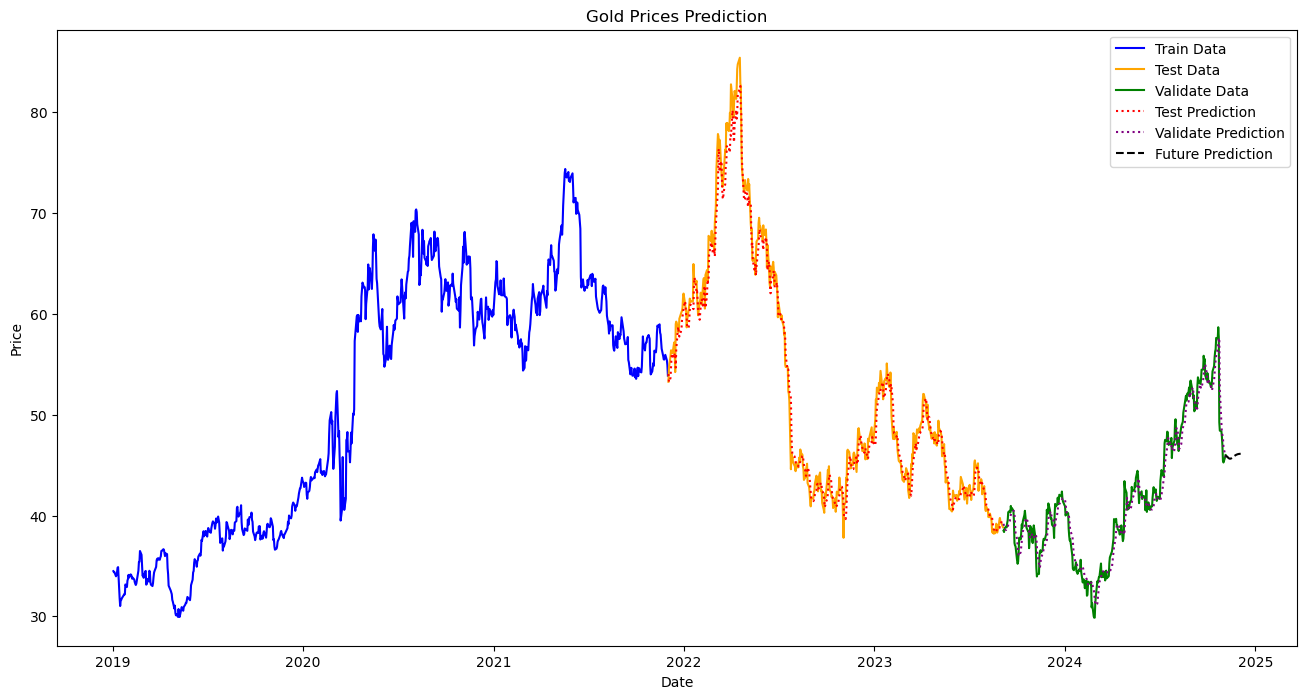

In [58]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [56]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.9774640835416666
MAPE:  1.8610993275450811
RMSE:  1.3211106598685085

** Validate **
MAE:  0.8488351855595205
MAPE:  2.115770736052229
RMSE:  1.1963514363950505


# Evaluating model

---

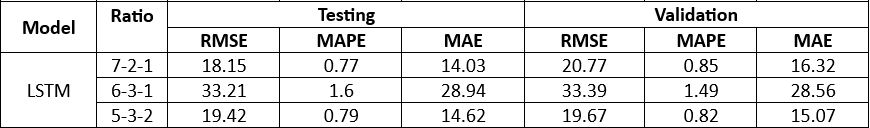